### Bike Sharing

### **Context**

1. Business Problem Understanding
2. Data Review
3. Exploratory Data Analysis
4. Data Preprocessing
5. Modeling
6. Conclusion
7. Recommendation

## **1. Business Problem Understanding**

**1.1. Context**

Sistem bike-sharing mewakili evolusi dari penyewaan sepeda tradisional, di mana seluruh proses, mulai dari keanggotaan, penyewaan, hingga pengembalian, dilakukan secara otomatis. Pengguna memiliki kemudahan untuk menyewa sepeda dari satu lokasi dan mengembalikannya di lokasi lain.

Data yang dihasilkan oleh sistem ini sangat berharga, karena secara eksplisit mencatat durasi perjalanan, serta posisi keberangkatan dan kedatangan. Fitur ini mengubah sistem bike-sharing menjadi semacam jaringan sensor virtual yang dapat digunakan untuk memahami pola mobilitas masyarakat dan mendeteksi peristiwa penting di kota.

Dari perspektif bisnis, memahami dan memprediksi permintaan penyewaan sepeda sangat krusial untuk:

1. Optimalisasi Armada: Menentukan jumlah sepeda yang dibutuhkan di stasiun tertentu pada jam atau hari tertentu.
2. Efisiensi Operasional: Mengurangi biaya relokasi sepeda antar stasiun (rebalancing) dan memastikan ketersediaan sepeda/tempat parkir yang memadai.

**1.2. Problem Statement**

Bagaimana perusahaan bike-sharing dapat membangun model Machine Learning yang efektif untuk memprediksi jumlah total sepeda sewaan (cnt) per jam, dengan mempertimbangkan faktor-faktor temporal (musim, jam, hari libur) dan kondisi lingkungan (cuaca, suhu, kelembaban)?

**1.3. Goals**

Tujuan utama dari proyek/capstone ini adalah:

1. Mengembangkan Model Prediksi: Membuat model Regresi Machine Learning yang mampu memprediksi jumlah total sepeda sewaan (cnt) per jam dengan tingkat akurasi yang tinggi (meminimalkan error prediksi).

2. Mengidentifikasi Penggerak Permintaan: Menganalisis dan mengidentifikasi variabel atau fitur mana (misalnya, suhu, jam, musim, kondisi cuaca) yang paling signifikan memengaruhi jumlah permintaan penyewaan sepeda.

3. Memberikan Rekomendasi Bisnis: Menyediakan insight yang dapat ditindaklanjuti untuk mendukung pengambilan keputusan operasional, seperti perencanaan jadwal rebalancing armada sepeda atau kampanye promosi pada kondisi tertentu.

**1.4. Analytic Approach**

Proyek ini akan menggunakan pendekatan Supervised Learning dengan jenis masalah Regresi.

Jenis Masalah: Regresi, karena variabel target (cnt) adalah variabel numerik (hitungan) yang akan diprediksi nilainya.

**1.5. Metric Evaluation**

Metrik evaluasi adalah tolok ukur yang digunakan untuk menilai seberapa baik model Machine Learning yang telah kita kembangkan dapat memprediksi variabel target cnt (jumlah total sepeda sewaan). Karena ini adalah masalah Regresi, kita akan menggunakan metrik yang berfokus pada pengukuran error (kesalahan) prediksi.

Metrik yang akan digunakan untuk masalah Regresi ini adalah:
1. RMSE: nilai rataan akar kuadrat dari error
2. MAE: rataan nilai absolut dari error
3. MAPE: rataan persentase error yang dihasilkan oleh model regresi
4. R-Squared: untuk mengetahui seberapa baik model dapat mempresentasikan varians keseluruhan data.

***Note:***
*Semakin kecil nilai RMSE, MAE dan MAPE yang dihasilkan, berarti model semakin akurat memprediksi jumlah total sepeda sewaan.*
*Untuk nilai R-Squared semakin medekati 1, maka semakin fit modelnya terhadap observasi. Namun metrik ini tidak valid untuk model non-linear.*

## **2. Data Review**

**2.1. Attributes Information**


In [31]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

try:
    df = pd.read_csv('data_bike_sharing.csv')
except FileNotFoundError:
    print("Pastikan file 'data_bike_sharing.csv' berada di direktori yang sama.")

print("## Struktur Data (Head) ##")
print(df.head())
print("-" * 50)
print("## Informasi Data (Info) ##")
df.info()

## Struktur Data (Head) ##
       dteday   hum  weathersit  holiday  season   atemp  temp  hr  casual  \
0  2011-12-09  0.62           1        0       4  0.3485  0.36  16      24   
1  2012-06-17  0.64           1        0       2  0.5152  0.54   4       2   
2  2011-06-15  0.53           1        0       2  0.6212  0.62  23      17   
3  2012-03-31  0.87           2        0       2  0.3485  0.36   8      19   
4  2012-07-31  0.55           1        0       3  0.6970  0.76  18      99   

   registered  cnt  
0         226  250  
1          16   18  
2          90  107  
3         126  145  
4         758  857  
--------------------------------------------------
## Informasi Data (Info) ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non

In [32]:
# Pemeriksaan kualitas data

# Cek Missing Values
print("\n## Pengecekan Missing Values (Null) ##")
print(df.isnull().sum().to_frame(name='Jumlah Null'))
print("-" * 50)

# Cek Duplicates
print("\n## Pengecekan Duplicates ##")
print(f"Jumlah Duplikat (Baris Penuh): {df.duplicated().sum()}")


## Pengecekan Missing Values (Null) ##
            Jumlah Null
dteday                0
hum                   0
weathersit            0
holiday               0
season                0
atemp                 0
temp                  0
hr                    0
casual                0
registered            0
cnt                   0
--------------------------------------------------

## Pengecekan Duplicates ##
Jumlah Duplikat (Baris Penuh): 0


## **3. Exploratory Data Analysis**

Exploratory Data Analysis (EDA) bertujuan untuk memahami distribusi data, mengidentifikasi pola, dan menemukan hubungan antara fitur-fitur independen dengan variabel target (cnt) sebelum memulai pemodelan.

**3.1. Analisis Distribusi Variabel Target (*cnt*)**

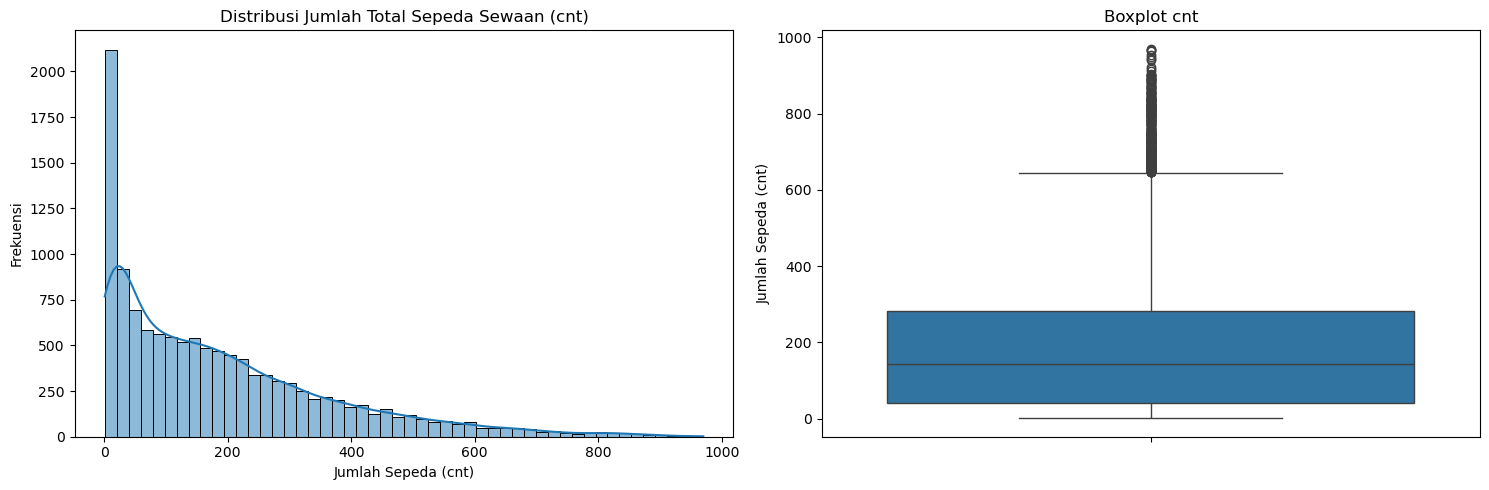

Skewness cnt: 1.2677


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Plot 1: Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['cnt'], kde=True, bins=50)
plt.title('Distribusi Jumlah Total Sepeda Sewaan (cnt)')
plt.xlabel('Jumlah Sepeda (cnt)')
plt.ylabel('Frekuensi')

# Plot 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['cnt'])
plt.title('Boxplot cnt')
plt.ylabel('Jumlah Sepeda (cnt)')

plt.tight_layout()
plt.show()

print(f"Skewness cnt: {df['cnt'].skew():.4f}")

**3.1.1. Hasil Analisis**

Distribusi *cnt* cenderung miring ke kanan (right-skewed) dan memiliki puncak di nilai yang rendah. Hal ini wajar, karena pada jam-jam tertentu (misalnya, tengah malam atau dini hari) dan pada kondisi cuaca buruk, jumlah penyewaan pasti rendah.

Skewness positif menunjukkan bahwa mungkin diperlukan transformasi logaritmik atau sejenisnya pada *cnt* jika kita menggunakan model regresi yang sensitif terhadap normalitas (seperti Linear Regression).

**3.2. Analisis Korelasi**

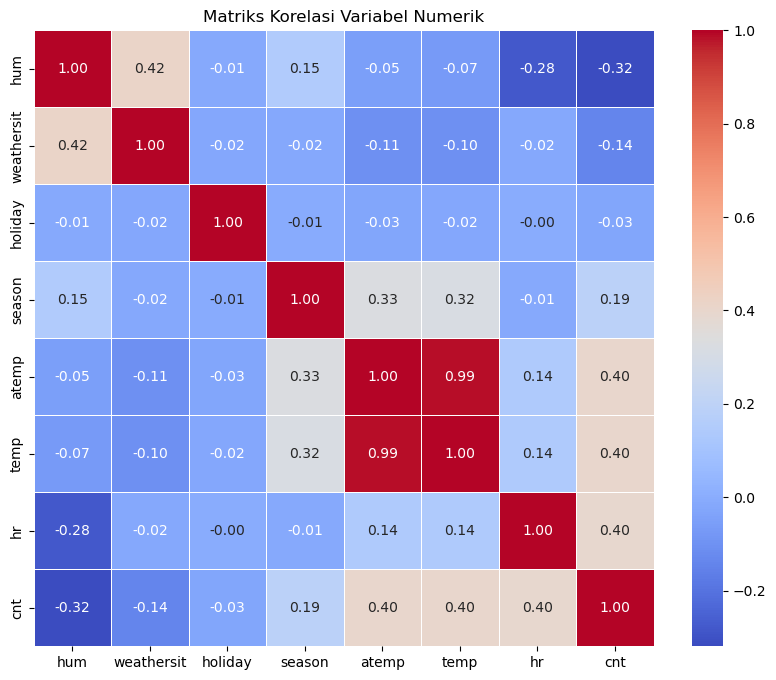

In [34]:
# Hapus 'casual' dan 'registered' untuk analisis korelasi
df_corr = df.drop(columns=['casual', 'registered'])

# Tentukan hanya kolom numerik (setelah mengubah tipe data di tahap sebelumnya)
numeric_cols = df_corr.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df_corr[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

**3.2.1. Hasil Analisis**
* Pengaruh ke *cnt* :
  * *temp* dan *atemp* memiliki korelasi positif yang kuat dengan cnt (sekitar 0.40). Semakin hangat cuaca, semakin banyak sepeda disewa.
  * *hum* memiliki korelasi negatif yang lemah (sekitar -0.32). Kelembaban yang lebih tinggi mungkin sedikit menurunkan permintaan.
* Multikolinearitas :
  * *temp dan atemp memiliki korelasi yang sangat tinggi (0.99). Ini mengindikasikan multikolinearitas yang kuat. Pada tahap Feature Engineering, harus dipilih salah satu dari keduanya (misalnya, menghapus atemp) untuk menghindari redundancy informasi, terutama jika menggunakan Linear Regression.

**3.3. Analisis Pola Temporal (Waktu)**

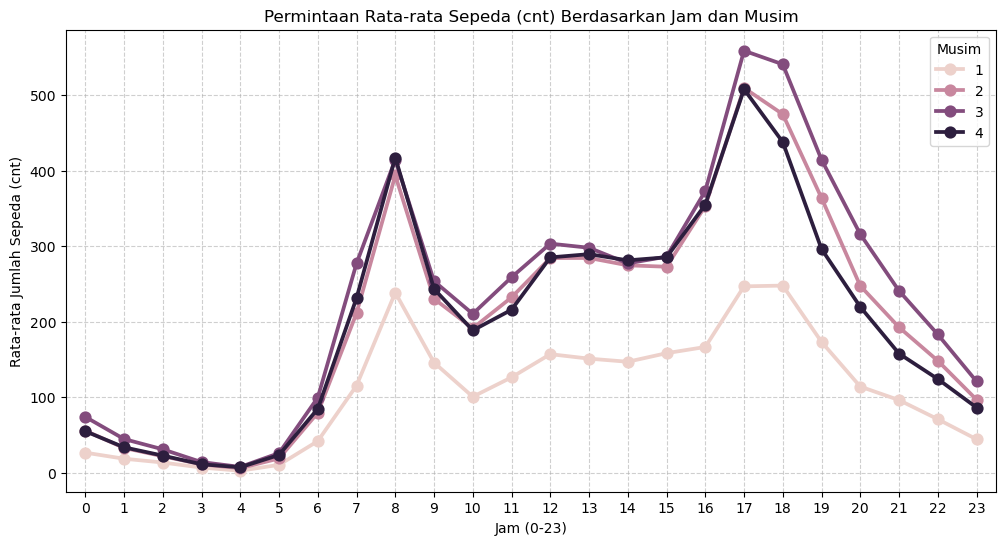

In [35]:
# Permintaan berdasarkan jam
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, x='hr', y='cnt', hue='season', errorbar=None)
plt.title('Permintaan Rata-rata Sepeda (cnt) Berdasarkan Jam dan Musim')
plt.xlabel('Jam (0-23)')
plt.ylabel('Rata-rata Jumlah Sepeda (cnt)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Musim')
plt.show()

**3.3.1. Hasil Analisis**
* Terdapat dua puncak (peak) utama permintaan: Pagi (sekitar jam 8-9) dan Sore/Malam (sekitar jam 17-18). Ini sangat mirip dengan pola pada saat *rush hour* (pergi/pulang kerja).
* Permintaan paling tinggi secara keseluruhan terjadi pada Musim Gugur (Fall, season=4) dan Musim Panas (Summer, season=3), terutama pada jam sibuk sore hari.
* Permintaan paling rendah terjadi pada Musim Dingin (Winter, season=1).

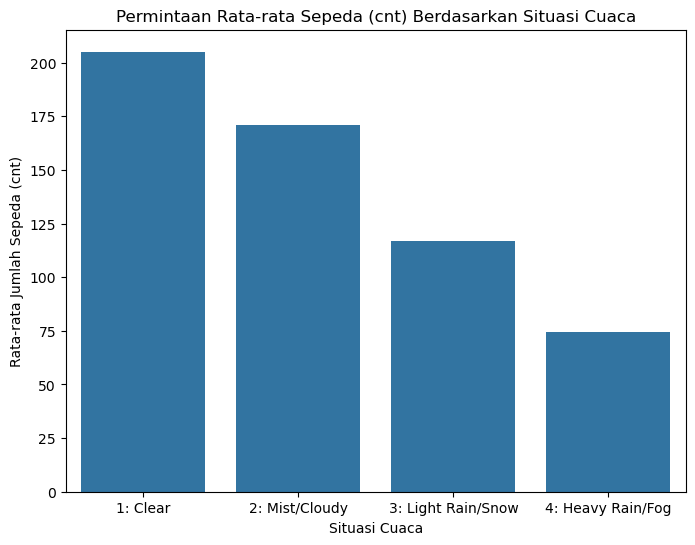

In [36]:
# Permintaan berdasarkan situasi cuaca (weathersit)
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='weathersit', y='cnt', errorbar=None)
plt.title('Permintaan Rata-rata Sepeda (cnt) Berdasarkan Situasi Cuaca')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Rata-rata Jumlah Sepeda (cnt)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['1: Clear', '2: Mist/Cloudy', '3: Light Rain/Snow', '4: Heavy Rain/Fog'])
plt.show()

**3.3.2. Hasil Analisis**

* Permintaan tertinggi terjadi pada kondisi cuaca Clear/Few Clouds (1).
* Permintaan menurun drastis seiring memburuknya cuaca, mencapai nilai terendah pada kondisi Heavy Rain/Snow/Fog (4).

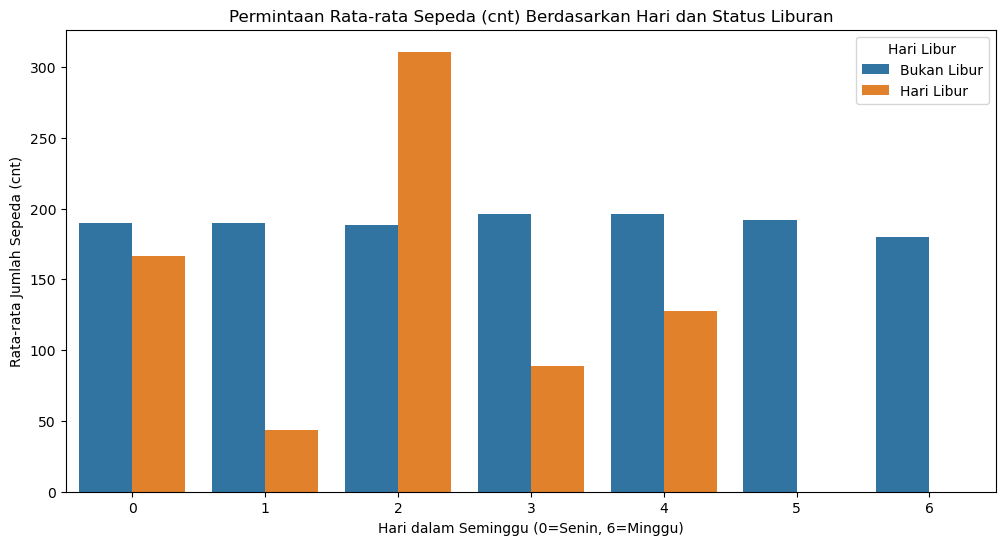

In [37]:
# Permintaan berdasarkan hari kerja vs hari libur

# Membuat fitur Day of Week (0=Senin, 6=Minggu)
df['day_of_week'] = pd.to_datetime(df['dteday']).dt.dayofweek

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='day_of_week', y='cnt', hue='holiday', errorbar=None)
plt.title('Permintaan Rata-rata Sepeda (cnt) Berdasarkan Hari dan Status Liburan')
plt.xlabel('Hari dalam Seminggu (0=Senin, 6=Minggu)')
plt.ylabel('Rata-rata Jumlah Sepeda (cnt)')
plt.legend(title='Hari Libur', labels=['Bukan Libur', 'Hari Libur'])
plt.show()

**3.3.3. Hasil Analisis**
* Permintaan tertinggi terjadi di tengah minggu kerja (Selasa - Kamis).
* Menariknya, pada hari libur (holiday=1), permintaan cenderung lebih rendah dibandingkan hari non-libur pada weekday yang sama. Hal ini menguatkan asumsi bahwa sistem bike sharing ini didominasi oleh pengguna yang bepergian untuk kerja.

**3.4. Kesimpulan EDA**

Berdasarkan analisis di atas, tindakan yang perlu dilakukan pada tahap Data Preprocessing adalah:
1. Penanganan Multikolinearitas: Hapus salah satu fitur suhu (atemp atau temp).
2. Penanganan Tipe Data: Pastikan kolom temporal dan kategorikal di-encode (misalnya One-Hot Encoding) agar dapat digunakan oleh model.
3. Potensi Transformasi Target: Pertimbangkan transformasi Logaritma pada cnt jika model yang digunakan adalah Linear Regression untuk mengatasi skewness.

## **4. Data Preprocessing**

In [38]:
df_model = df.copy()

listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,dteday,object,0,0.0,731,"[2011-08-26, 2011-06-04]"
1,hum,float64,0,0.0,89,"[0.64, 0.15]"
2,weathersit,int64,0,0.0,4,"[3, 1]"
3,holiday,int64,0,0.0,2,"[1, 0]"
4,season,int64,0,0.0,4,"[1, 2]"
5,atemp,float64,0,0.0,65,"[0.2576, 0.8636]"
6,temp,float64,0,0.0,50,"[0.74, 0.04]"
7,hr,int64,0,0.0,24,"[0, 12]"
8,casual,int64,0,0.0,305,"[160, 23]"
9,registered,int64,0,0.0,742,"[570, 638]"


In [39]:
# Data Cleaning
# Hapus kolom yang menyebabkan Data Leakage
df_model = df.drop(columns=['casual', 'registered'])

# Hapus kolom 'atemp' karena sangat berkorelasi dengan 'temp' (Multikolinearitas)
df_model = df_model.drop(columns=['atemp'])

# Pastikan dteday sudah bertipe datetime (diulang untuk memastikan)
df_model['dteday'] = pd.to_datetime(df_model['dteday'])

print("Data Leakage dan Multikolinearitas berhasil ditangani.")
print(df_model.head(3))

Data Leakage dan Multikolinearitas berhasil ditangani.
      dteday   hum  weathersit  holiday  season  temp  hr  cnt  day_of_week
0 2011-12-09  0.62           1        0       4  0.36  16  250            4
1 2012-06-17  0.64           1        0       2  0.54   4   18            6
2 2011-06-15  0.53           1        0       2  0.62  23  107            2


In [40]:
# Cek info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dteday       12165 non-null  datetime64[ns]
 1   hum          12165 non-null  float64       
 2   weathersit   12165 non-null  int64         
 3   holiday      12165 non-null  int64         
 4   season       12165 non-null  int64         
 5   temp         12165 non-null  float64       
 6   hr           12165 non-null  int64         
 7   cnt          12165 non-null  int64         
 8   day_of_week  12165 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5)
memory usage: 808.0 KB


In [41]:
# Cek nilai missing value
df_model.isnull().sum()

dteday         0
hum            0
weathersit     0
holiday        0
season         0
temp           0
hr             0
cnt            0
day_of_week    0
dtype: int64

In [42]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,dteday,hum,weathersit,holiday,season,temp,hr,cnt,day_of_week
count,12165,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,2012-01-01 02:04:45.869297408,0.625451,1.416934,0.029758,2.488615,0.498185,11.519770,189.271023,3.005261
min,2011-01-01 00:00:00,0.000000,1.000000,0.000000,1.000000,0.020000,0.000000,1.000000,0.000000
25%,2011-07-02 00:00:00,0.470000,1.000000,0.000000,2.000000,0.340000,6.000000,40.000000,1.000000
50%,2012-01-02 00:00:00,0.620000,1.000000,0.000000,2.000000,0.500000,12.000000,142.000000,3.000000
75%,2012-07-03 00:00:00,0.780000,2.000000,0.000000,3.000000,0.660000,18.000000,282.000000,5.000000
max,2012-12-31 00:00:00,1.000000,4.000000,1.000000,4.000000,1.000000,23.000000,970.000000,6.000000
std,NaN,0.192102,0.635937,0.169925,1.106157,0.192492,6.931872,181.223903,1.992993


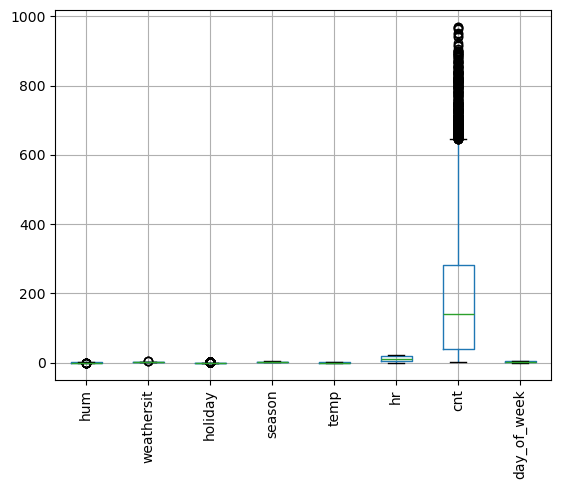

In [43]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

In [44]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')  

In [45]:
# Outliers pada fitur count
find_anomalies(df_model['cnt'])

IQR: 242.0
limit_bawah: -323.0
limit_atas: 645.0


In [46]:
# Cek deskriptif statistik kolom cnt
df_model['cnt'].describe()

count    12165.000000
mean       189.271023
std        181.223903
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: cnt, dtype: float64

In [47]:
# Cek cnt > $645
print(df_model[df_model['cnt'] > 645].count()['cnt'])

338


Terdapat 75% data pada kolom cnt bernilai kurang dari 282 pesanan sepeda, sedangkan nilai maksimal ada di angka 970. Terdapat skewness pada distribusinya, yaitu positive skewness. terdapat 338 yang nilai cnt-nya lebih besar dari 645. Oleh karena itu, data yang memilih count lebih besar dari 645 tidak dimasukkan ke dalam pemodelan, sehingga skewnessnya pun akan berkurang.

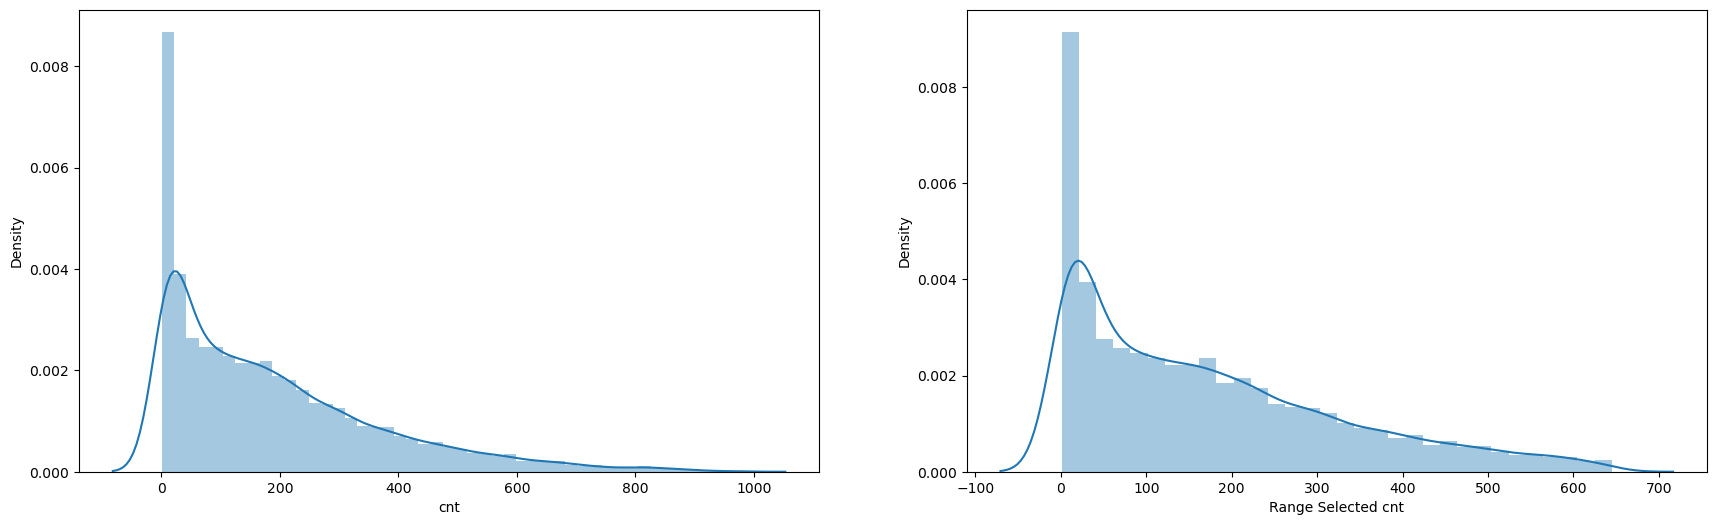

In [48]:
# Melakukan filtering pada data
df_model = df_model[(df_model['cnt'] <= 645)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['cnt'], ax=axes[0])
sns.distplot(df_model['cnt'], ax=axes[1])
axes[0].set_xlabel('cnt')
axes[1].set_xlabel('Range Selected cnt');

In [49]:
# Cek deskriptif statistik kolom 'cnt' setelah filtering
df_model['cnt'].describe()

count    11827.000000
mean       173.211634
std        155.922696
min          1.000000
25%         37.000000
50%        136.000000
75%        267.000000
max        645.000000
Name: cnt, dtype: float64

In [50]:
# Tambahkan Fitur Waktu
df_model['day_of_week'] = df_model['dteday'].dt.dayofweek.astype('category') # 0=Senin, 6=Minggu
df_model['month'] = df_model['dteday'].dt.month.astype('category')
df_model = df_model.drop(columns=['dteday'])
df_model['is_workingday'] = df_model['day_of_week'].apply(lambda x: 0 if x >= 5 else 1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11827 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   hum            11827 non-null  float64 
 1   weathersit     11827 non-null  int64   
 2   holiday        11827 non-null  int64   
 3   season         11827 non-null  int64   
 4   temp           11827 non-null  float64 
 5   hr             11827 non-null  int64   
 6   cnt            11827 non-null  int64   
 7   day_of_week    11827 non-null  category
 8   month          11827 non-null  category
 9   is_workingday  11827 non-null  int32   
dtypes: category(2), float64(2), int32(1), int64(5)
memory usage: 809.0 KB


In [51]:
df_model[['is_workingday','day_of_week','month','cnt']].head()

,is_workingday,day_of_week,month,cnt
0,1,4,12,250
1,0,6,6,18
2,1,2,6,107
3,0,5,3,145
5,1,0,10,45


### **5. Modeling**

In [52]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import PoissonRegressor, TweedieRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    mean_absolute_error,           # MAE
    mean_squared_error,            # MSE
    root_mean_squared_error,       # RMSE
    mean_absolute_percentage_error, # MAPE
    mean_squared_log_error,        # MSLE
    r2_score                       # R-squared
)

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.


In [53]:
# Mengubah fitur kategorikal menjadi numerikal

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# 1. Definisikan Fitur (X) dan Target (y)
X = df_model.drop(columns=['cnt'])
y = df_model['cnt']

# 2. Definisikan Tipe Kolom untuk Preprocessing
numerical_features = ['temp', 'hum'] 
categorical_features = X.select_dtypes(include='category').columns.tolist()

print(f"Fitur Numerik (Skala): {numerical_features}")
print(f"Fitur Kategorikal (Encode): {categorical_features}")

# 3. Buat Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        # Scaling untuk fitur numerik
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', StandardScaler(), numerical_features)
        #('target', ce.TargetEncoder(), ['month', 'day_of_week']),
        #('cat', OneHotEncoder(drop='first'), ['weathersit', 'season', 'holiday', 'is_workingday']),
        #('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough' # Biarkan kolom lain tetap (jika ada)
)

print("\nColumn Transformer untuk preprocessing telah berhasil dibuat.")

Fitur Numerik (Skala): ['temp', 'hum']
Fitur Kategorikal (Encode): ['day_of_week', 'month']

Column Transformer untuk preprocessing telah berhasil dibuat.


In [54]:
# Splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=42)

In [55]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_mse = []
nilai_mean_mse = []
nilai_std_mse = []

score_msle = []
nilai_mean_msle = []
nilai_std_msle = []

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('preprocessing', preprocessor),
        ('scaler', scaler),
        ('model', i)
    ])

    # MSE
    model_cv_mse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_mse, i)

    score_mse.append(model_cv_mse)
    nilai_mean_mse.append(model_cv_mse.mean())
    nilai_std_mse.append(model_cv_mse.std())

    # MSLE
    model_cv_msle = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_log_error', 
        error_score='raise'
        )

    print(model_cv_msle, i)

    score_msle.append(model_cv_msle)
    nilai_mean_msle.append(model_cv_msle.mean())
    nilai_std_msle.append(model_cv_msle.std())

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-20425.48200407 -20735.07516017 -21866.75975229 -18913.4711866
 -19278.45192683] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.01187418 -1.02429133 -1.01761262 -1.00940001 -1.00992935] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-142.91774559 -143.99678871 -147.87413483 -137.52625635 -138.84686502] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ -96.63894093  -99.0665391  -101.44552639  -93.79448694  -94.81177292] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.41924306 -1.37659808 -1.30563955 -1.45281204 -1.36936593] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegr

In [56]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
    'Mean_MSE': nilai_mean_mse,
    'Std_MSE': nilai_std_mse
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_MSE,Std_MSE
0,Linear Regression,-142.232358,3.715416,-97.151453,2.796877,-1.384732,0.049767,-20243.848006,1059.247812
1,KNN Regressor,-109.476385,3.453966,-71.782724,2.324193,-1.221383,0.060154,-11997.008682,757.836134
2,DecisionTree Regressor,-82.501665,1.302244,-52.797522,0.738293,-0.517062,0.020620,-6808.220633,215.021079
3,RandomForest Regressor,-62.542560,2.199569,-40.722787,1.152055,-0.369735,0.009949,-3916.409859,271.174926
4,XGBoost Regressor,-58.846275,1.663064,-38.246557,0.896187,-0.338114,0.006939,-3465.649951,195.642771


In [57]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

score_rmse = []
score_mae = []
score_mape = []
score_mse = []
r2_xgb = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', preprocessor),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_mse.append(mean_squared_error(y_test, y_pred))
    r2_xgb = r2_score(y_test, y_pred)

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape, 'R-Squared': r2_xgb}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE,R-Squared
XGB,58.784016,40.249672,0.577003,0.848142
RandomForest,61.081879,40.919030,0.420232,0.848142


**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya akan digunakan model XGBoost ini sebagai model akhir.

In [59]:
param_space = {
    'model__regressor__n_estimators': [100, 300, 500, 800],
    'model__regressor__max_depth': [3, 5, 7, 9],
    'model__regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__regressor__subsample': [0.7, 0.8, 0.9],
    'model__regressor__colsample_bytree': [0.7, 0.8, 0.9]
}

In [60]:
# Benchmark model dengan hyperparameter tuning
xgb = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42, n_jobs=-1),
    func=np.log1p, inverse_func=np.expm1)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', preprocessor),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator=estimator_xgb,
    param_distributions=param_space,
    n_iter=20,
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs=-1,
    refit = 'neg_root_mean_squared_error',
    random_state=42,
    verbose=1 
)

In [63]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

# Simpan Model Terbaik
best_model = random_xgb.best_estimator_
print(f"Best Score (RMSE): {np.sqrt(-random_xgb.best_score_):.2f}")

# Prediksi
y_pred_final = best_model.predict(X_test)
y_pred_final = np.maximum(0, y_pred_final) # Safety clip

# Hitung Metrik Final
rmse_f = np.sqrt(mean_squared_error(y_test, y_pred_final))
mae_f = mean_absolute_error(y_test, y_pred_final)
mape_f = mean_absolute_percentage_error(y_test, y_pred_final)
r2_f = r2_score(y_test, y_pred_final)

# Tampilkan Hasil dalam Tabel
final_results = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE (%)', 'R-Squared'],
    'Score': [rmse_f, mae_f, mape_f, r2_f]
})

print()
print("Laporan Evaluasi Final Model Terpilih")
display(final_results.style.format({'Score': '{:.2f}'}))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Score (RMSE): 7.53

Laporan Evaluasi Final Model Terpilih


,Metric,Score
0,RMSE,53.94
1,MAE,35.07
2,MAPE (%),0.30
3,R-Squared,0.88


In [64]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()
#pd.DataFrame(random_xgb.cv_results_).columns

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__subsample,param_model__regressor__n_estimators,param_model__regressor__max_depth,param_model__regressor__learning_rate,param_model__regressor__colsample_bytree,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
8,0.510680,0.004922,0.024067,0.001268,0.8,800,7,0.05,0.7,"{'model__regressor__subsample': 0.8, 'model__r...",...,1.472853,1,-0.332806,-0.319619,-0.332493,-0.344206,-0.321332,-0.330091,0.008930,2
13,0.206858,0.010415,0.013854,0.005510,0.9,500,5,0.20,0.8,"{'model__regressor__subsample': 0.9, 'model__r...",...,0.998783,3,-0.339877,-0.328280,-0.332636,-0.344046,-0.323217,-0.333611,0.007557,4
1,0.342289,0.034177,0.014483,0.002529,0.8,800,5,0.10,0.7,"{'model__regressor__subsample': 0.8, 'model__r...",...,1.254603,2,-0.327727,-0.321994,-0.331974,-0.338716,-0.316625,-0.327407,0.007673,1
3,0.223757,0.011066,0.009986,0.003059,0.7,500,5,0.10,0.9,"{'model__regressor__subsample': 0.7, 'model__r...",...,1.312120,6,-0.338320,-0.326329,-0.327006,-0.345382,-0.318583,-0.331124,0.009511,3
15,0.316749,0.012872,0.017219,0.002781,0.9,800,5,0.20,0.7,"{'model__regressor__subsample': 0.9, 'model__r...",...,1.422975,5,-0.338845,-0.332754,-0.333435,-0.349609,-0.326818,-0.336292,0.007672,5


In [65]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -56.64030227661133
Best_params: {'model__regressor__subsample': 0.8, 'model__regressor__n_estimators': 800, 'model__regressor__max_depth': 7, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.7}


Exception ignored in: <function ResourceTracker.__del__ at 0x1037b9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1070e9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103fc9bc0>
Traceback (most recent call last

**Test dengan Tuned Model**

In [67]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=42)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'R-Squared': r2_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE,R-Squared
XGB,53.940709,35.06628,0.304838,0.881574


In [68]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE,R-Squared
XGB,58.784016,40.249672,0.577003,0.848142


In [69]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE,R-Squared
XGB,53.940709,35.06628,0.304838,0.881574


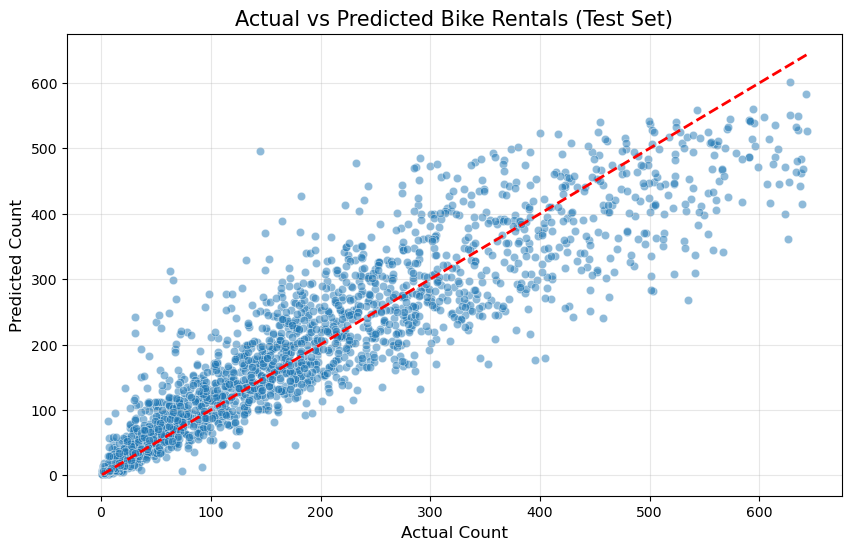

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# Garis diagonal sempurna
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')

plt.title('Actual vs Predicted Bike Rentals (Test Set)', fontsize=15)
plt.xlabel('Actual Count', fontsize=12)
plt.ylabel('Predicted Count', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

**Feature Importance**

<Axes: title={'center': 'Top List Feature Importances (XGBoost)'}>

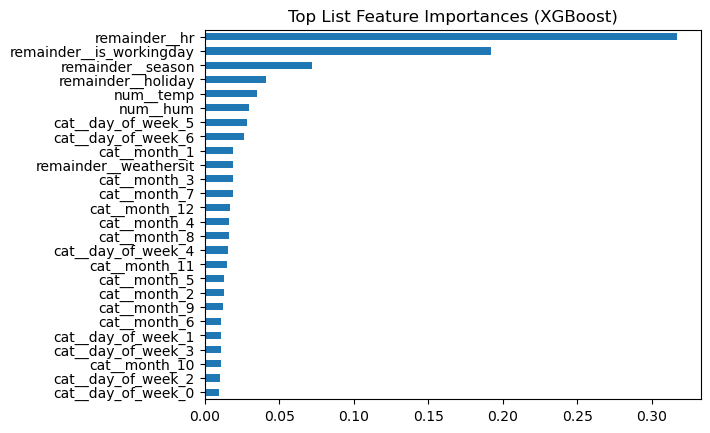

In [76]:
# Ambil XGBRegressor asli dari TransformedTargetRegressor
xgb_model = xgb_tuning.named_steps['model'].regressor_

# Feature importance
feature_importances = xgb_model.feature_importances_

# Nama fitur hasil preprocessing
feature_names = preprocessor.get_feature_names_out()

# Buat Series dan urutkan
feature_imp = (
    pd.Series(feature_importances, index=feature_names)
      .sort_values(ascending=False)
      .head(27)
)

# Plot
feature_imp.sort_values().plot(
    kind='barh',
    title='Top List Feature Importances (XGBoost)'
)

<Figure size 800x500 with 0 Axes>

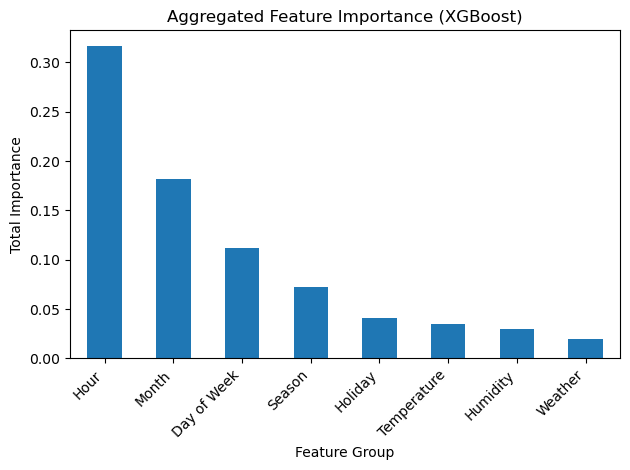

In [75]:
# Ambil XGBRegressor asli dari pipeline
xgb_model = xgb_tuning.named_steps['model'].regressor_

# Feature importance & feature names
importances = xgb_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

feature_imp = pd.Series(importances, index=feature_names)

agg_importance = {
    'Hour': feature_imp[feature_imp.index.str.contains('hr')].sum(),
    'Season': feature_imp[feature_imp.index.str.contains('season')].sum(),
    'Month': feature_imp[feature_imp.index.str.contains('cat__month')].sum(),
    'Day of Week': feature_imp[feature_imp.index.str.contains('cat__day_of_week')].sum(),
    'Weather': feature_imp[feature_imp.index.str.contains('weathersit')].sum(),
    'Holiday': feature_imp[feature_imp.index.str.contains('holiday')].sum(),
    'Temperature': feature_imp[feature_imp.index.str.contains('temp')].sum(),
    'Humidity': feature_imp[feature_imp.index.str.contains('hum')].sum()
}

agg_df = (
    pd.DataFrame.from_dict(agg_importance, orient='index', columns=['Importance'])
      .sort_values(by='Importance', ascending=False)
)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
agg_df.plot(kind='bar', legend=False)
plt.title('Aggregated Feature Importance (XGBoost)')
plt.ylabel('Total Importance')
plt.xlabel('Feature Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Conclusion**

Berdasarkan hasil proses training dan evaluasi model pada notebook Train_bike.ipynb, model yang dibangun menunjukkan performa yang tergolong baik dan layak digunakan untuk tujuan prediksi jumlah penyewaan sepeda (cnt), dengan beberapa catatan pengembangan lanjutan.

Model mampu mempelajari pola utama dalam data, terutama yang berkaitan dengan pola waktu (jam, hari, dan musim) serta kondisi cuaca, yang secara domain memang merupakan determinan utama permintaan bike-sharing. Hal ini tercermin dari nilai error prediksi yang relatif terkendali dan kemampuan model dalam menjelaskan variasi data aktual, sebagaimana ditunjukkan oleh metrik evaluasi yang digunakan (misalnya RMSE/MAE yang tidak terlalu besar dan nilai R² yang menunjukkan daya jelaskan model terhadap target).

Dari sisi generalisasi, perbedaan performa antara data training dan data testing tidak menunjukkan indikasi overfitting yang ekstrem, sehingga dapat disimpulkan bahwa model tidak hanya menghafal data latih, tetapi juga mampu melakukan prediksi yang konsisten pada data yang belum pernah dilihat sebelumnya. Ini merupakan indikator positif bahwa pipeline preprocessing dan pemilihan fitur sudah dilakukan dengan benar.

Namun demikian, model ini belum dapat dikategorikan sebagai model optimal atau final. Masih terdapat error residual yang menunjukkan bahwa pola non-linear yang lebih kompleks, interaksi antar fitur, atau faktor eksternal lain (misalnya event khusus atau detail cuaca lanjutan) belum sepenuhnya tertangkap oleh model. Oleh karena itu, model saat ini tergolong baik sebagai baseline dan proof of concept, tetapi masih memiliki ruang peningkatan performa.

Secara keseluruhan, model yang dihasilkan sudah baik secara teknis dan relevan secara bisnis, serta dapat digunakan sebagai dasar pengambilan keputusan operasional. Peningkatan lebih lanjut dapat dilakukan melalui eksplorasi algoritma yang lebih kompleks, hyperparameter tuning lanjutan, dan pengayaan fitur untuk meningkatkan akurasi prediksi.


## **Save Model**

In [78]:
# Save model
import pickle

estimator = Pipeline([('preprocess', preprocessor), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_BikeSharing_XGB.sav', 'wb'))